# **Predicting if a customer will make a Deposit**

## **Importing Packages**

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc



## **Loading Dataset**

In [73]:
df = pd.read_csv('/content/bank-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [74]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (45211, 17)


## **Exploratory Data Analysis**

### **Missing Values**

In [75]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### **Unknown Values Count**

In [76]:
unknown_counts = (df == 'unknown').sum()

print("Count of 'unknown' values in each column:")
print(unknown_counts[unknown_counts > 0])


Count of 'unknown' values in each column:
job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


### **Class distribution**

<ipython-input-35-8895319997eb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='y', palette='Set3')  # Bright color palette


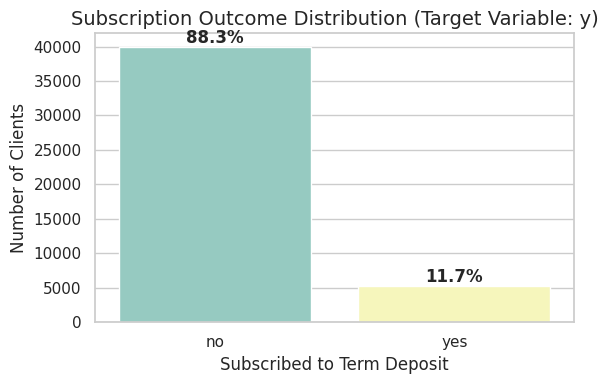

In [35]:
total = len(df)
class_counts = df['y'].value_counts()
percentages = (class_counts / total * 100).round(1)


plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='y', palette='Set3')

for p, percentage in zip(ax.patches, percentages):
    height = p.get_height()
    ax.annotate(f'{percentage}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Subscription Outcome Distribution (Target Variable: y)', fontsize=14)
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Number of Clients')
plt.tight_layout()
plt.show()

### **Descriptive Analysis**

In [36]:
summary_stats = df.describe()

print("Summary Statistics for Numerical Features:")
print(summary_stats)

Summary Statistics for Numerical Features:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000 

### **Univariate Analysis for numerical features**

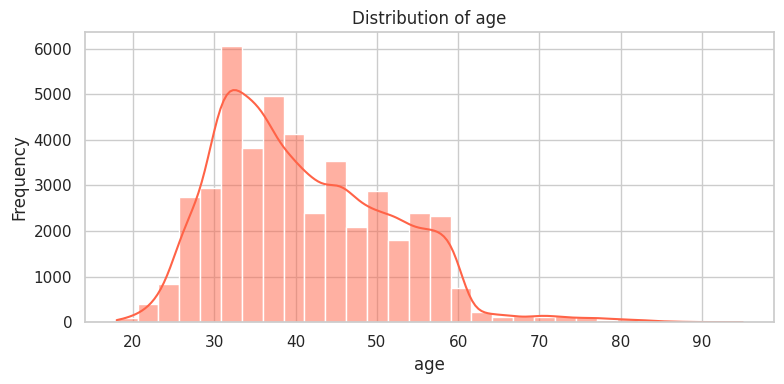

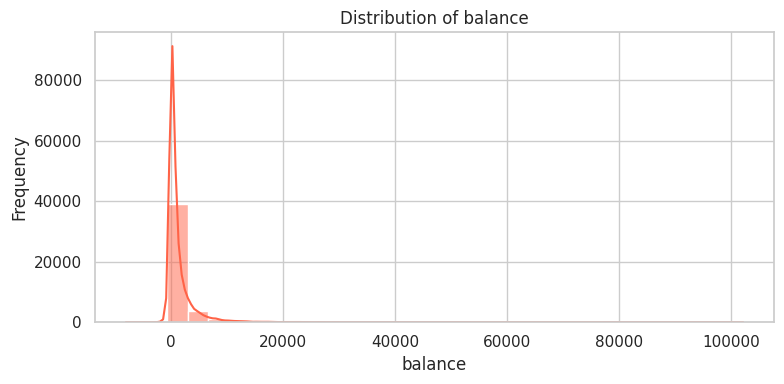

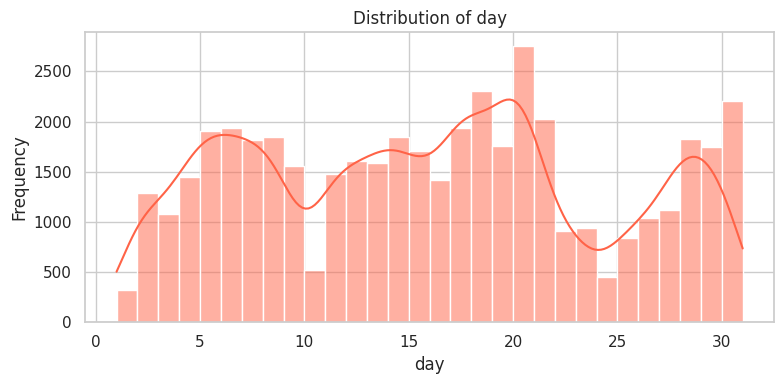

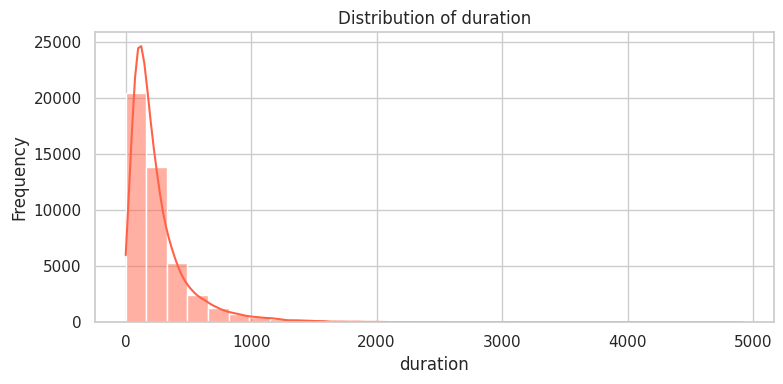

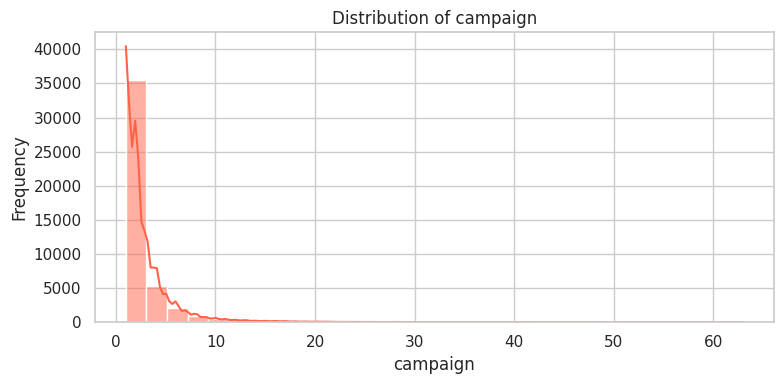

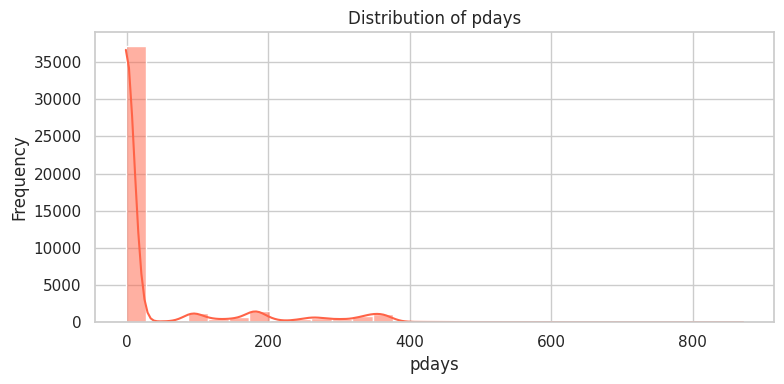

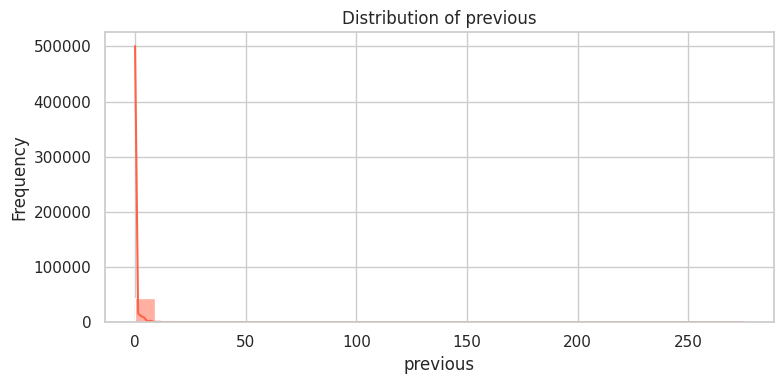

In [77]:
sns.set(style="whitegrid")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='tomato')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### **Univariate Analysis for Categorical features**

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


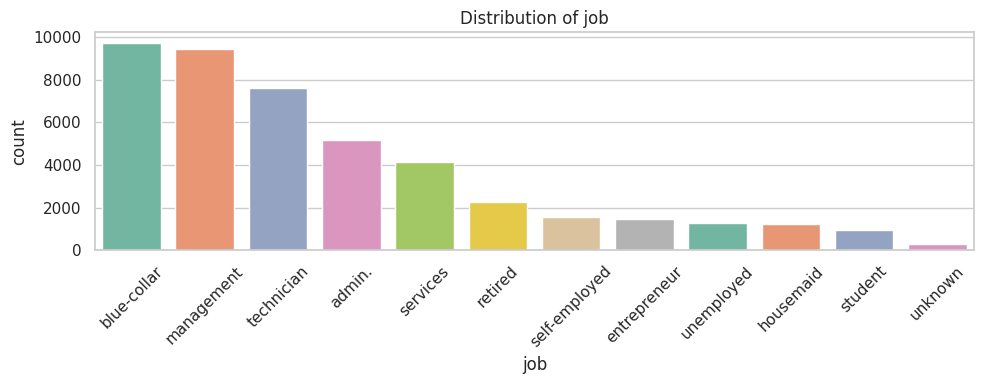

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


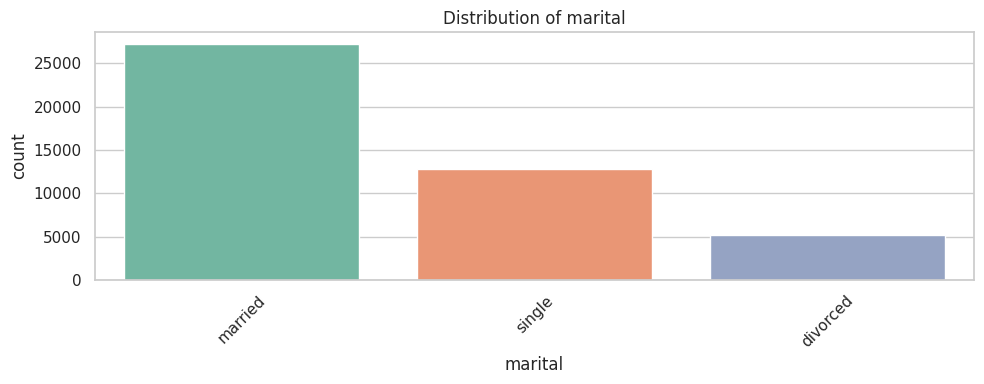

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


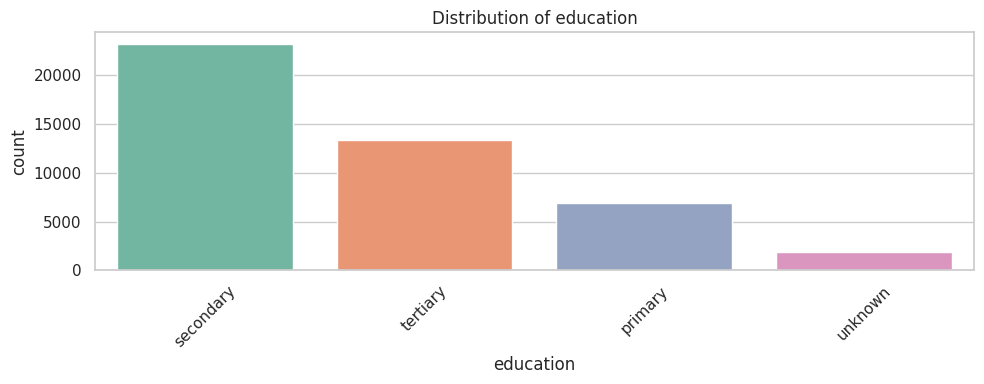

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


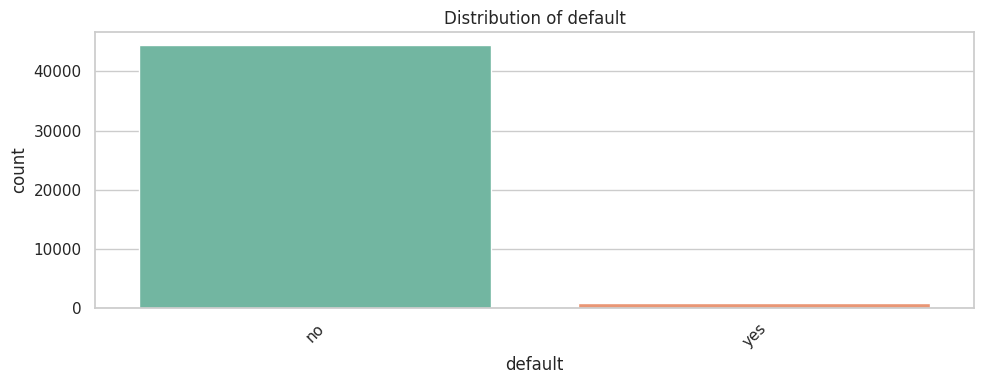

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


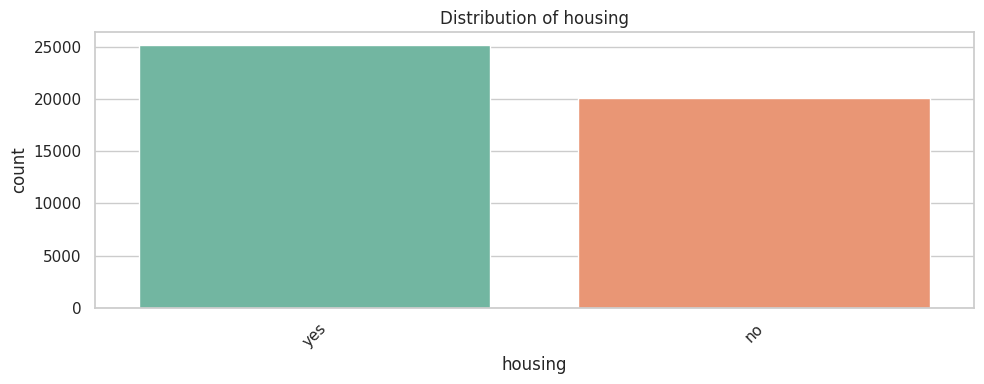

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


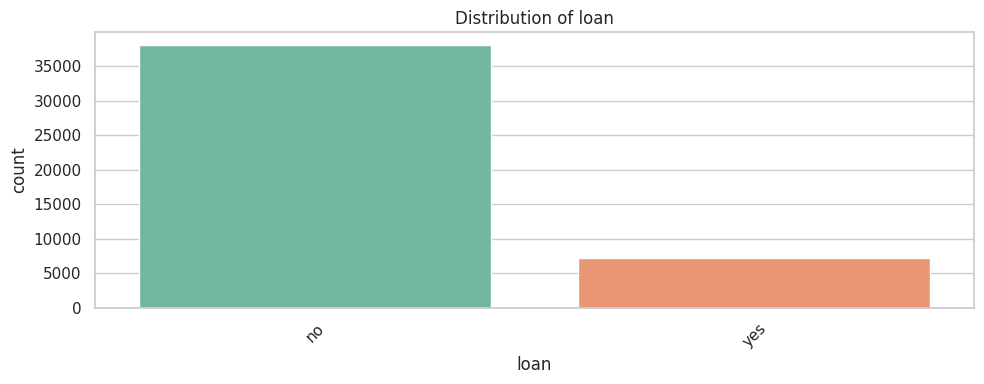

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


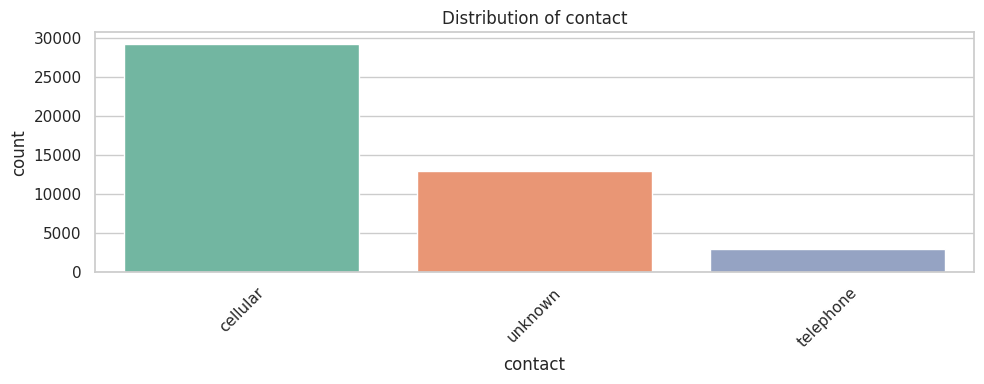

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


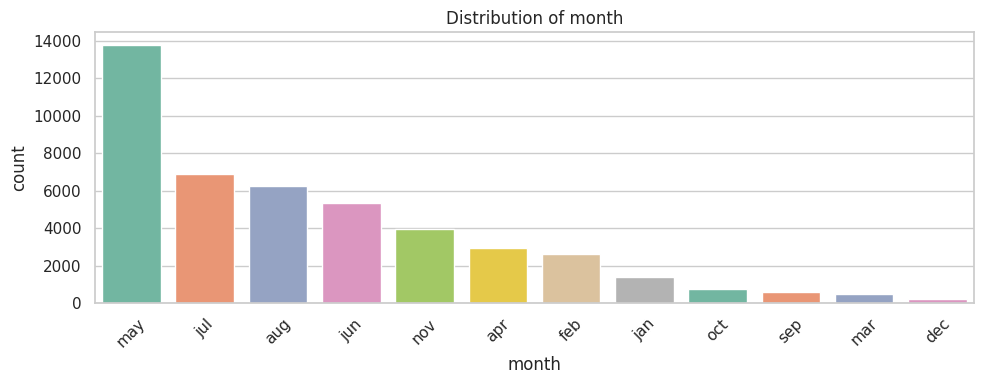

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


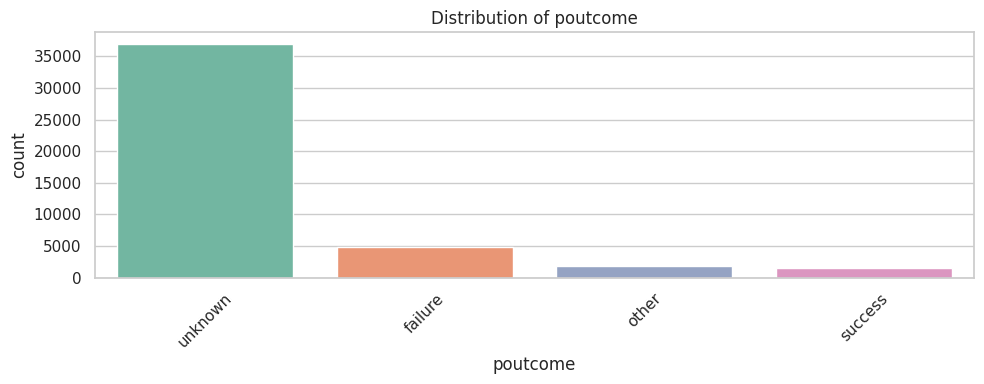

<ipython-input-38-39ebb4166fad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


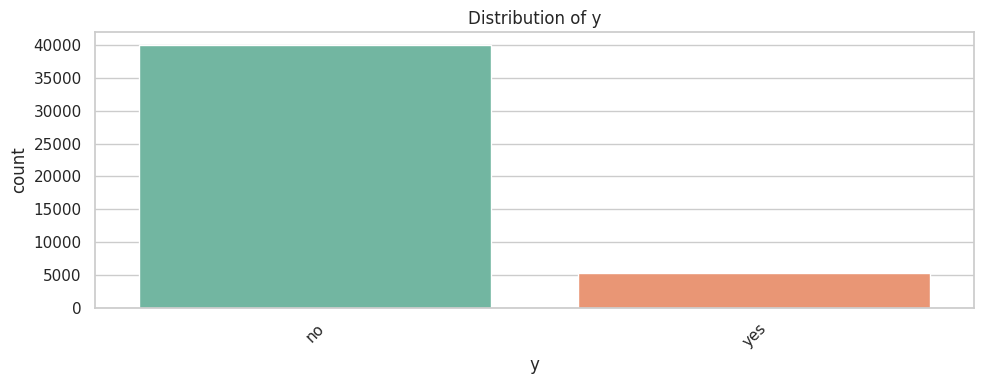

In [38]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **Bivariate Analysis for Categorical Features**

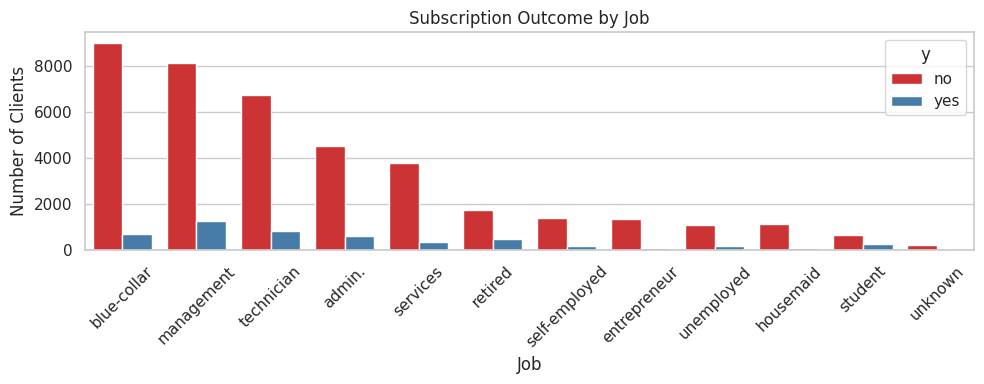

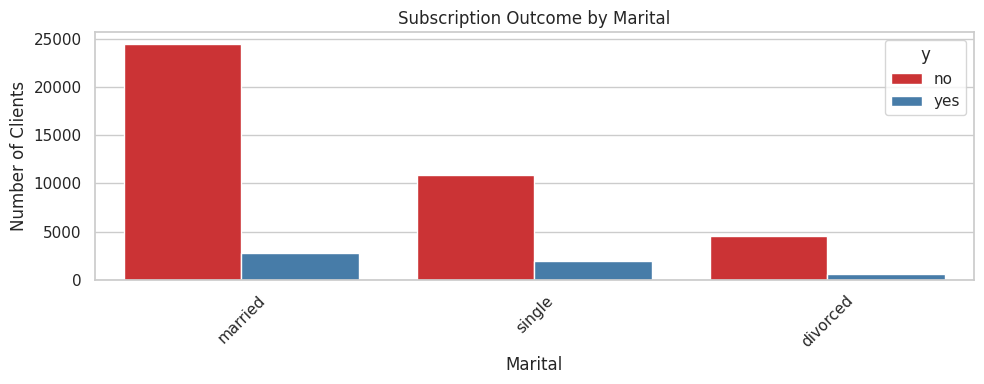

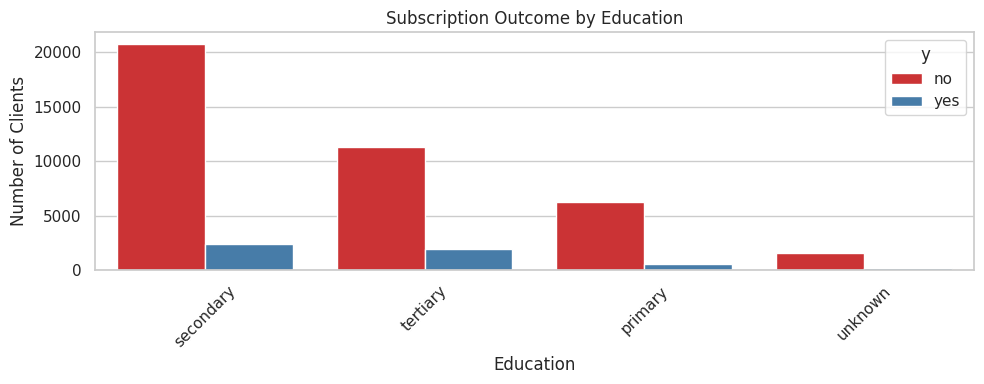

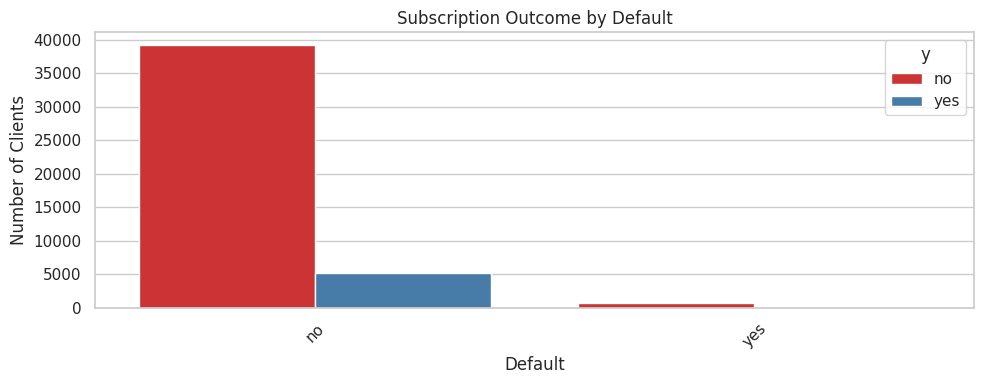

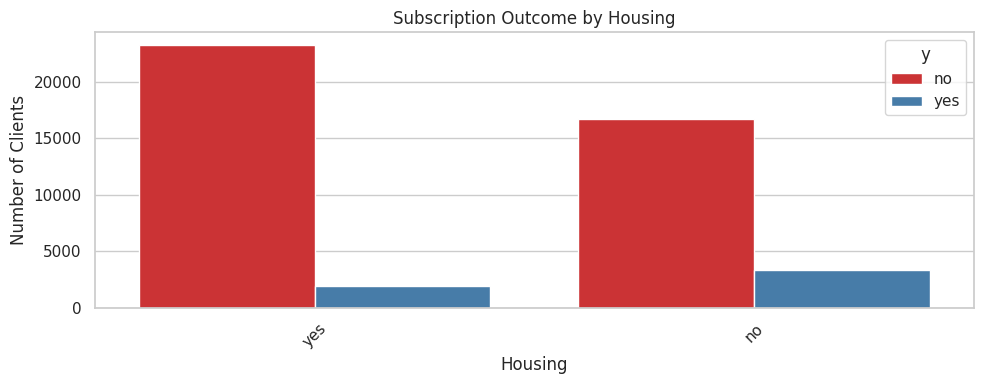

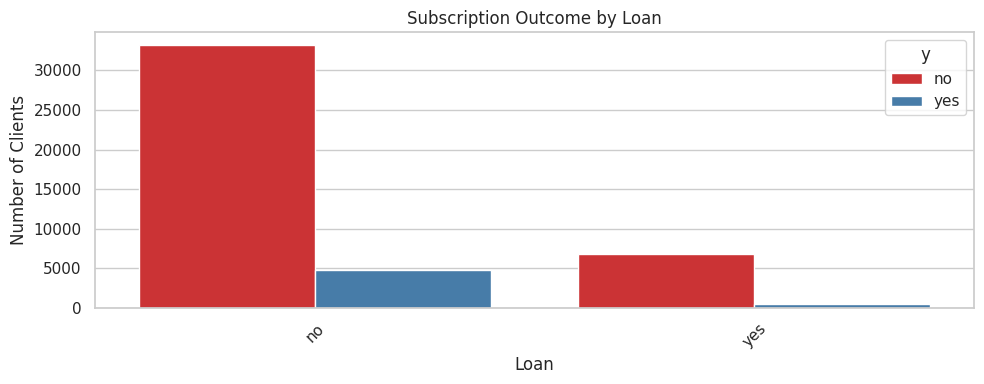

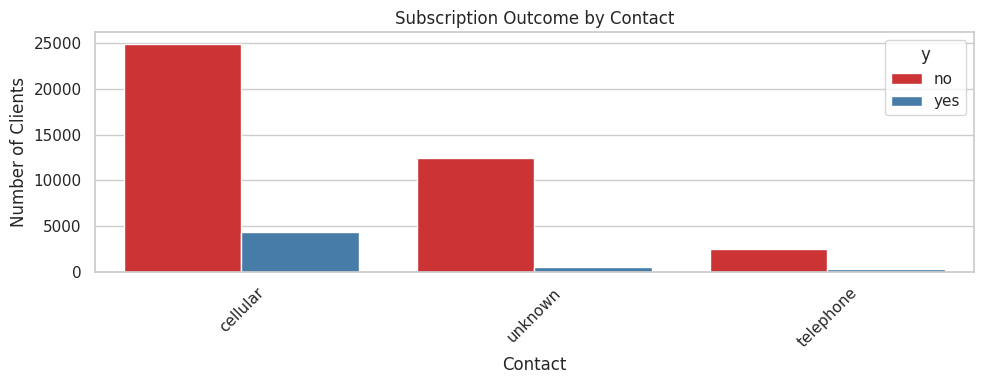

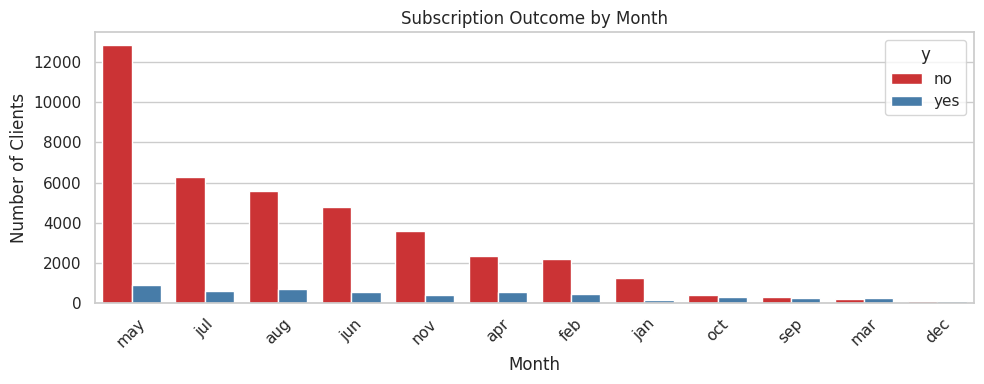

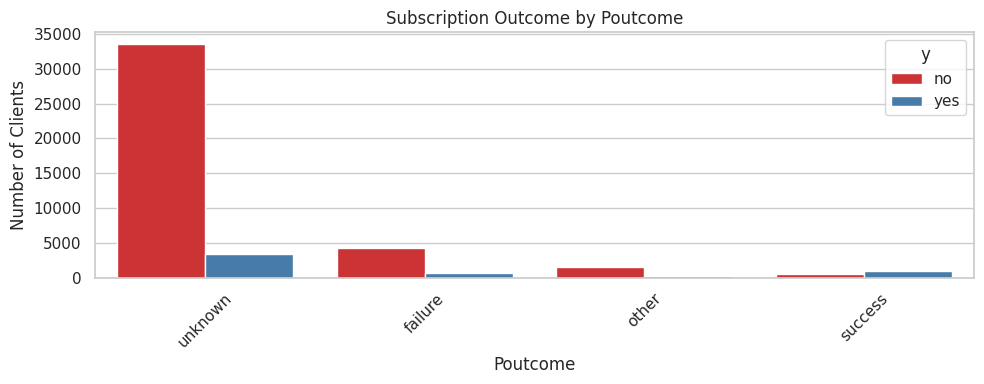

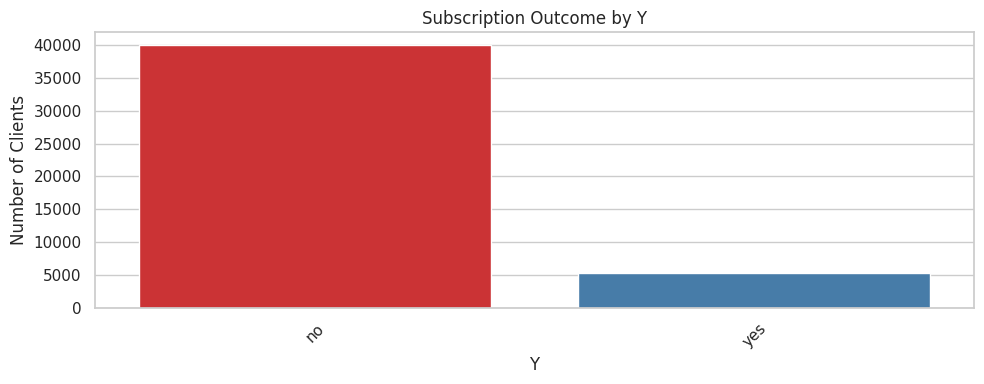

In [80]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='y', order=df[col].value_counts().index, palette='Set1')
    plt.title(f'Subscription Outcome by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Number of Clients')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **Bivariate Analysis for Numerical Features**

<ipython-input-82-fd2b282f5ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set3')


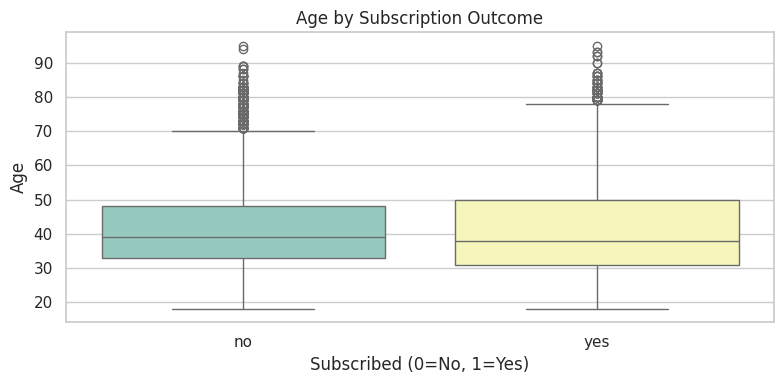

<ipython-input-82-fd2b282f5ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set3')


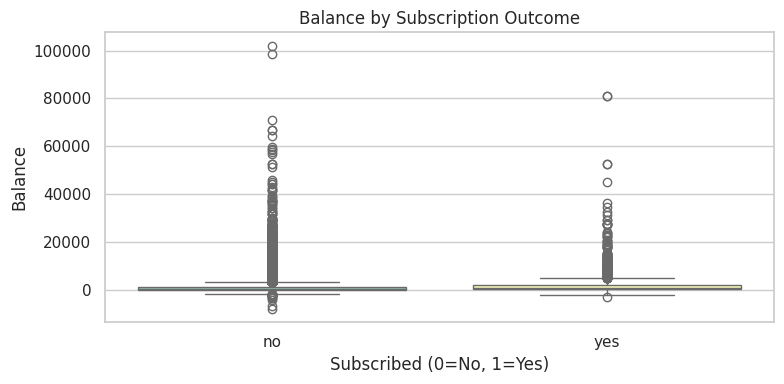

<ipython-input-82-fd2b282f5ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set3')


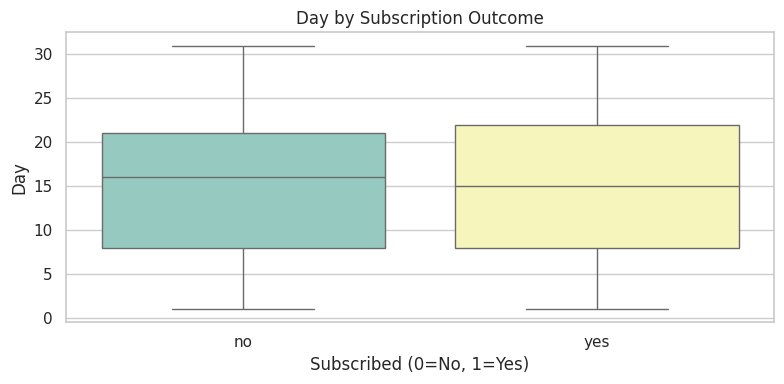

<ipython-input-82-fd2b282f5ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set3')


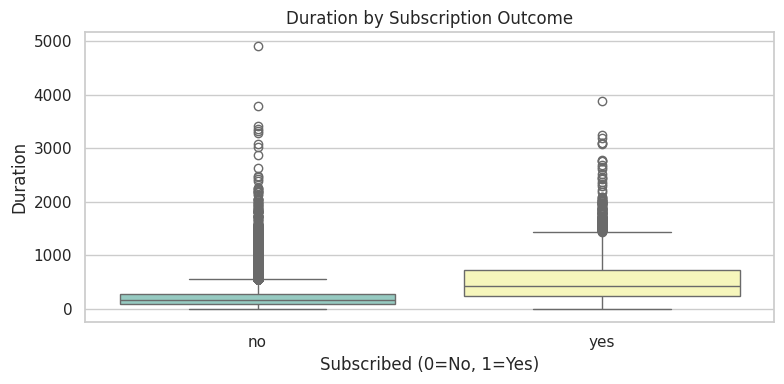

<ipython-input-82-fd2b282f5ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set3')


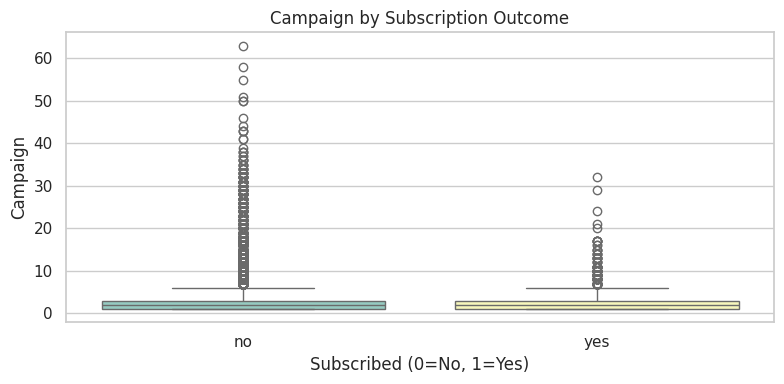

<ipython-input-82-fd2b282f5ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set3')


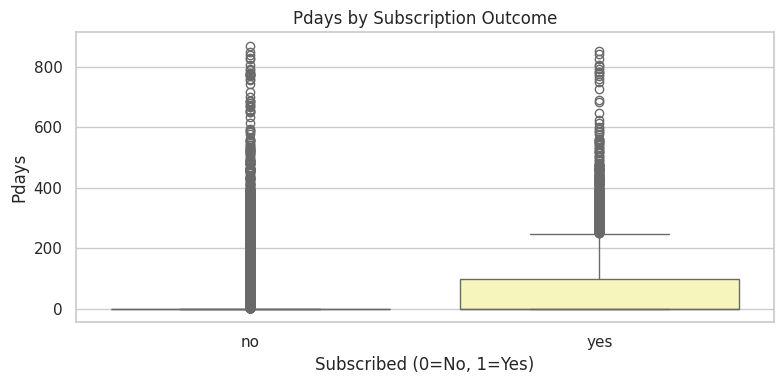

<ipython-input-82-fd2b282f5ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y=col, palette='Set3')


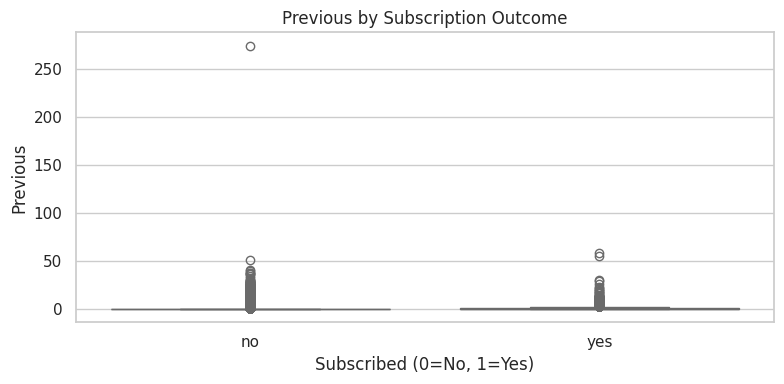

In [82]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='y', y=col, palette='Set3')
    plt.title(f'{col.capitalize()} by Subscription Outcome')
    plt.xlabel('Subscribed (0=No, 1=Yes)')
    plt.ylabel(col.capitalize())
    plt.tight_layout()
    plt.show()

### **Correlation Matrix among Numerical Features**

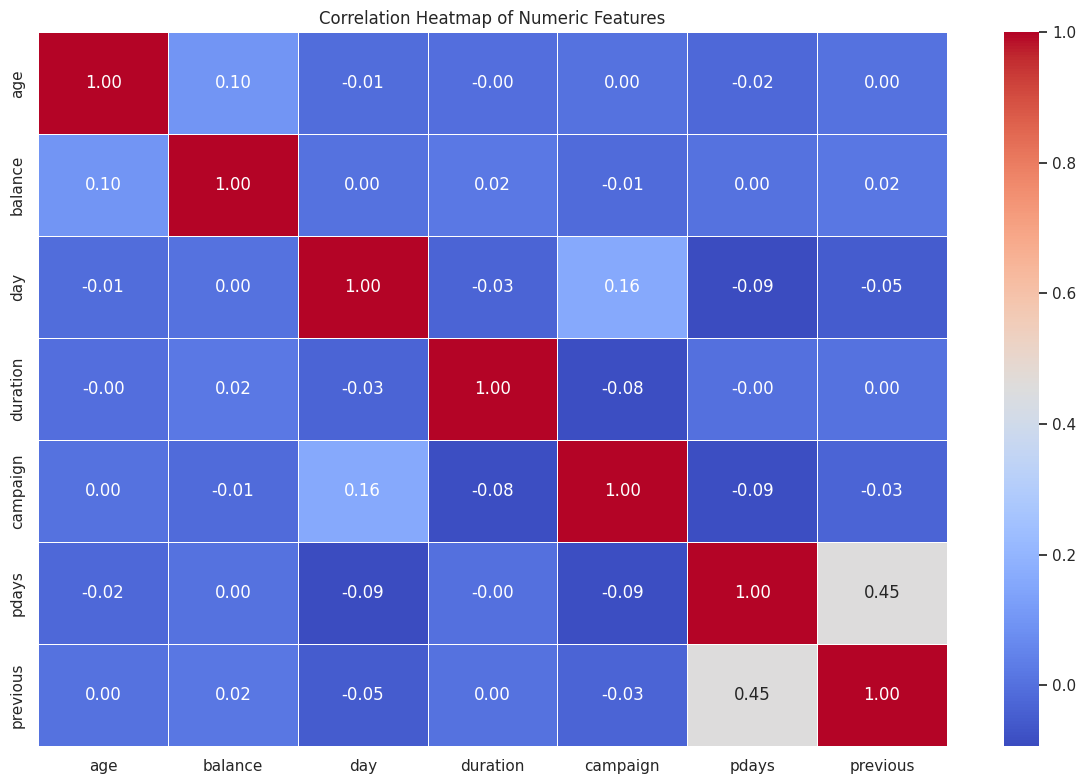

In [41]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## **Label encoding**

In [ ]:
binary_map = {'yes': 1, 'no': 0}
df['default'] = df['default'].map(binary_map)
df['housing'] = df['housing'].map(binary_map)
df['loan'] = df['loan'].map(binary_map)
df['y'] = df['y'].map(binary_map)  # target variable

education_order = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df['education'] = df['education'].map(education_order)
month_order = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month'] = df['month'].map(month_order)

##**One Hot Encoding**

In [42]:
nominal_cols = ['job', 'marital', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True,dtype=int)

df.head(5)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,1,0,0,1,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,1,0,0,0,1,0,1,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,0,0,1,0,0,1,0,0,1
3,47,0,0,1506,1,0,5,5,92,1,...,0,0,0,1,0,0,1,0,0,1
4,33,0,0,1,0,0,5,5,198,1,...,0,0,1,0,1,0,1,0,0,1


## **Logistic Regression**

### **Fitting the model**

In [43]:

X = df.drop(columns='y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

logit_model = sm.Logit(y_train, X_train).fit()


print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.251811
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36138
Method:                           MLE   Df Model:                           29
Date:                Sat, 10 May 2025   Pseudo R-squ.:                  0.3022
Time:                        04:41:22   Log-Likelihood:                -9107.5
converged:                       True   LL-Null:                       -13052.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0188      0.002     -9.874      0.000      -0.023      -0.015
educatio

### **Train Results across Thresholds**


=== Threshold: 0.5 ===
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31937
           1       0.64      0.32      0.43      4231

    accuracy                           0.90     36168
   macro avg       0.78      0.65      0.69     36168
weighted avg       0.88      0.90      0.88     36168



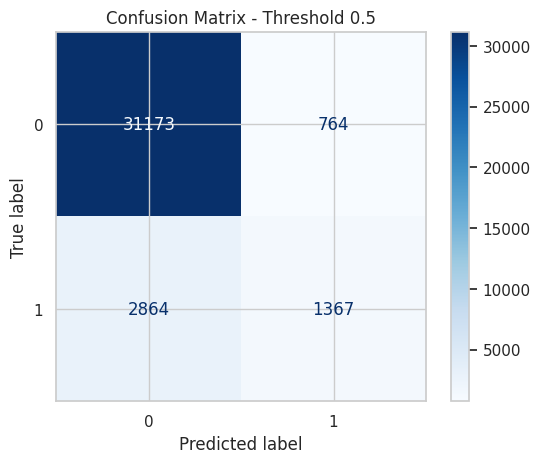


=== Threshold: 0.3 ===
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     31937
           1       0.56      0.50      0.53      4231

    accuracy                           0.90     36168
   macro avg       0.75      0.72      0.73     36168
weighted avg       0.89      0.90      0.89     36168



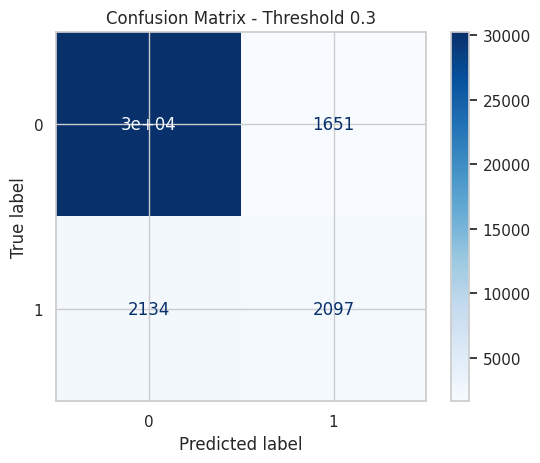


=== Threshold: 0.2 ===
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     31937
           1       0.47      0.63      0.54      4231

    accuracy                           0.88     36168
   macro avg       0.71      0.77      0.73     36168
weighted avg       0.89      0.88      0.88     36168



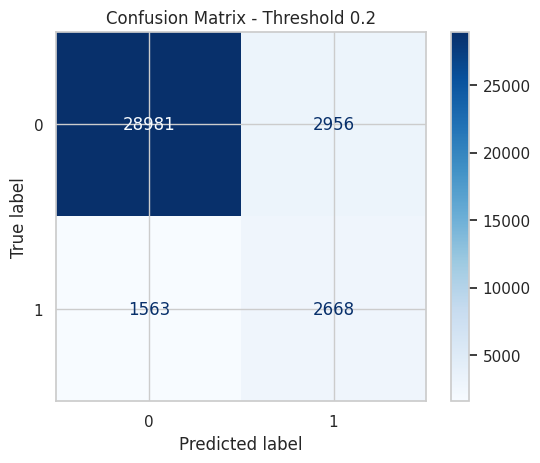

In [44]:
y_train_prob = logit_model.predict(X_train)

y_train_pred = (y_train_prob >= 0.5).astype(int)


thresholds = [0.5, 0.3, 0.2]

for threshold in thresholds:
    print(f"\n=== Threshold: {threshold} ===")

    y_train_pred = (y_train_prob >= threshold).astype(int)

    print("Classification Report:\n")
    print(classification_report(y_train, y_train_pred))

    cm = confusion_matrix(y_train, y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - Threshold {threshold}")
    plt.show()

### **Test Results(at 0.2 Threshold)**

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7985
           1       0.47      0.62      0.54      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.76      0.73      9043
weighted avg       0.89      0.88      0.88      9043



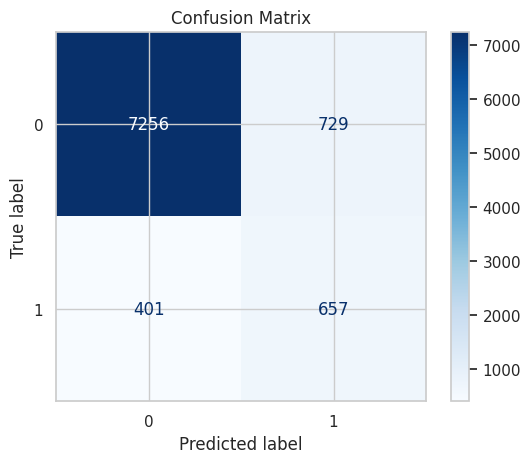

In [45]:
y_prob = logit_model.predict(X_test)
y_pred = (y_prob >= 0.2).astype(int)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## **KNN**

### **Scaling and Modeling**

In [48]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

### **Train the Model**

In [49]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

### **Train Results**

KNN Classification Report (Training Data):

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     31937
           1       0.76      0.45      0.57      4231

    accuracy                           0.92     36168
   macro avg       0.84      0.72      0.76     36168
weighted avg       0.91      0.92      0.91     36168



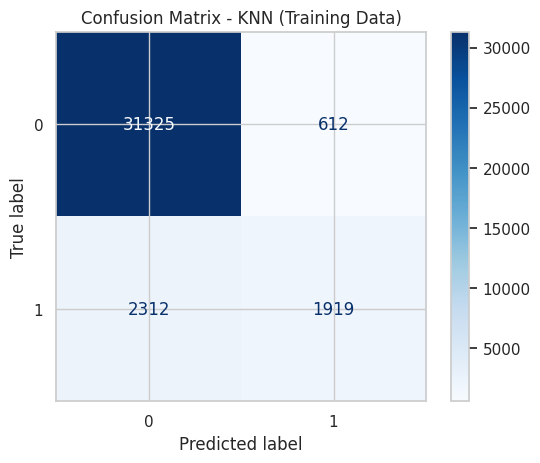

In [52]:

y_train_pred_knn = knn_pipeline.predict(X_train)


print("KNN Classification Report (Training Data):\n")
print(classification_report(y_train, y_train_pred_knn))


cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train_knn, display_labels=np.unique(y_train))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN (Training Data)")
plt.show()

### **Test Results**

KNN Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.56      0.30      0.39      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.88      9043



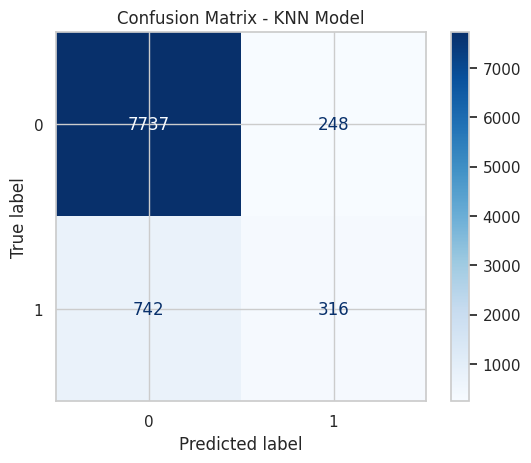

In [51]:
y_pred_knn = knn_pipeline.predict(X_test)

print("KNN Classification Report (Test Data):\n")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN Model")
plt.show()

## **Random Forest**

In [57]:

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)


rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

Random Forest Classification Report (Training Data):

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     31937
           1       0.52      0.82      0.64      4231

    accuracy                           0.89     36168
   macro avg       0.75      0.86      0.79     36168
weighted avg       0.92      0.89      0.90     36168



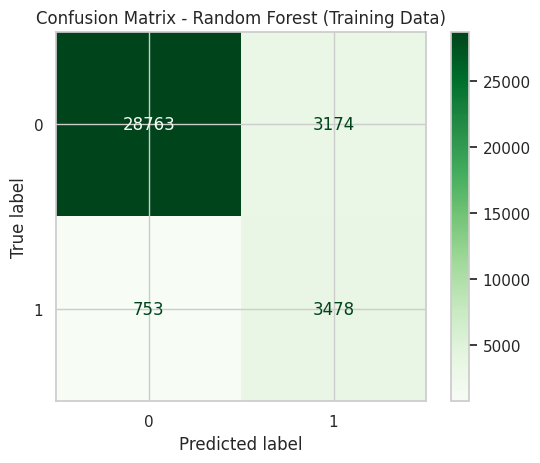

In [64]:
y_proba_train_rf = rf_model.predict_proba(X_train)[:, 1]

threshold = 0.2
y_pred_train_rf = (y_proba_train_rf >= threshold).astype(int)

print("Random Forest Classification Report (Training Data):\n")
print(classification_report(y_train, y_pred_train_rf))

cm_train_rf = confusion_matrix(y_train, y_pred_train_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=np.unique(y_train))
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest (Training Data)")
plt.show()

Random Forest Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7985
           1       0.48      0.77      0.59      1058

    accuracy                           0.88      9043
   macro avg       0.72      0.83      0.76      9043
weighted avg       0.91      0.88      0.89      9043



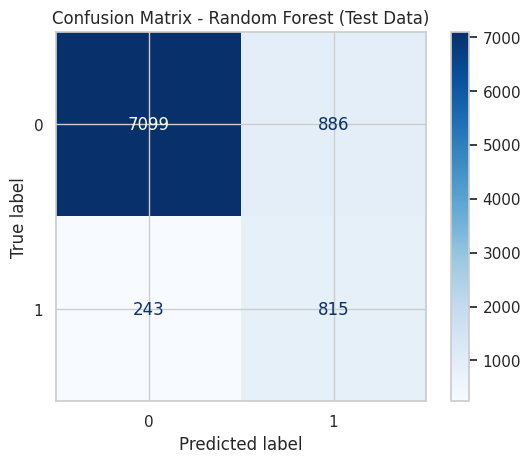

In [66]:
y_proba_test_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

threshold = 0.2
y_pred_test_rf = (y_proba_test_rf >= threshold).astype(int)

print("Random Forest Classification Report (Test Data):\n")
print(classification_report(y_test, y_pred_test_rf))

cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Test Data)")
plt.show()

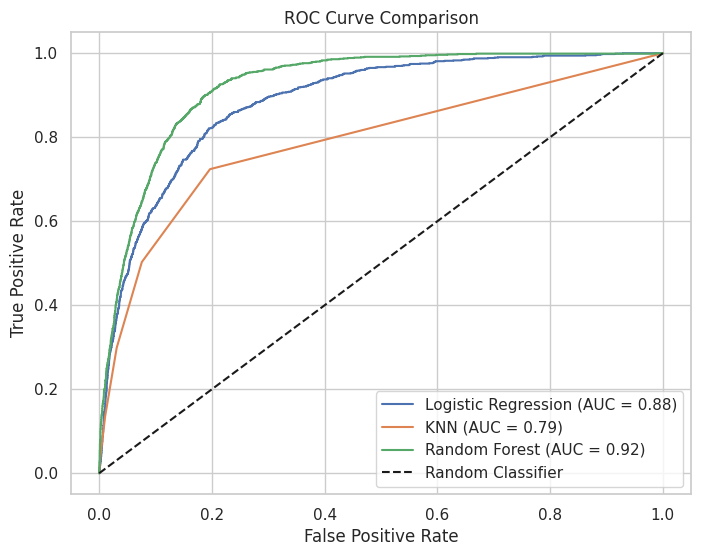

In [69]:
y_prob_logit = logit_model.predict(X_test)
y_prob_knn = knn_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_logit, tpr_logit, _ = roc_curve(y_test, y_prob_logit)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_logit = auc(fpr_logit, tpr_logit)
auc_knn = auc(fpr_knn, tpr_knn)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, label=f"Logistic Regression (AUC = {auc_logit:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()